#### **Project Title**: Student Movement Analysis
#### **Team Members**:
* CS21B1039 MUPPA PRABHAS REDDY 
* CS21B1038 DESETTI RAJESH

#### **Data Collection**
* **Source**: Student Movement Register
* **Raw Data File**: raw_student_movement.csv
* **Cleaned Data File**: cleaned_student_movement.csv

1.Data collection
2.Data preparation
    1.Data Discretization
	1.Data binning
	2.clustering
	3.Classification
    2.Data cleaning
	1.remove duplicates
	2.remove irrelevent data
	3.handle incomplete data
	4.remove outliers
	5.fix structural errors	
    3.Data integration
    4.Data Transformation
	1.smoothing
	2.aggregation
	3.genralization
	4.normalisation
    5.Data reduction

#### **Data Loading into DataFrame**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('raw_student_movement.csv')
data_types = df.dtypes
print("Data Types of Attributes\n........................")
print(data_types)
print("\nData: Student Movement Details\nSource: Student Movement Register\n")
df

Data Types of Attributes
........................
RollNumber        object
Hostel            object
RoomNumber       float64
VisitingPlace     object
OutTime           object
InTime            object
PhoneNumber      float64
dtype: object

Data: Student Movement Details
Source: Student Movement Register



,RollNumber,Hostel,RoomNumber,VisitingPlace,OutTime,InTime,PhoneNumber
0,EC22B1116,Ashoka,707.0,Kandigai,05:35,06:40,9.340809e+09
1,CED191001,Ashwatha,831.0,Intern,07:30,17:20,9.069869e+09
2,ME20B2018,Ashwatha,818.0,Kandigai,07:35,08:00,9.123835e+09
3,CED191016,Ashwatha,838.0,Intern,07:50,17:30,9.532587e+09
4,EC22B1115,Ashoka,705.0,Kandigai,08:00,08:15,9.295116e+09
...,...,...,...,...,...,...,...
133,NaN,Jasmine Annex,301.0,Milano,18:25,19:00,8.960993e+09
134,ME22B1021,Ashoka,NaN,Tambaram,17:10,21:25,8.960994e+09
135,CS23B1048,Jasmine Annex,420.0,Airport,02:35,05:50,8.234581e+09
136,CS23B1049,Jasmine Annex,420.0,Airport,02:35,05:50,8.234581e+09


#### **Type Conversion of Time to Time in Seconds**

In [2]:
# Function to convert time to seconds
def time_to_seconds(time_str):
    # Split the time string by ':'
    time_parts = time_str.split(':')
    # Convert hours and minutes to seconds and add them up
    total_seconds = int(time_parts[0]) * 3600 + int(time_parts[1]) * 60
    return total_seconds

# Apply the function to the 'OutTime' and 'InTime' column and create new 'OutTimeSeconds' and 'InTimeSeconds'columns
df['OutTimeSeconds'] = df['OutTime'].apply(time_to_seconds)
df['InTimeSeconds'] = df['InTime'].apply(time_to_seconds)

df

,RollNumber,Hostel,RoomNumber,VisitingPlace,OutTime,InTime,PhoneNumber,OutTimeSeconds,InTimeSeconds
0,EC22B1116,Ashoka,707.0,Kandigai,05:35,06:40,9.340809e+09,20100,24000
1,CED191001,Ashwatha,831.0,Intern,07:30,17:20,9.069869e+09,27000,62400
2,ME20B2018,Ashwatha,818.0,Kandigai,07:35,08:00,9.123835e+09,27300,28800
3,CED191016,Ashwatha,838.0,Intern,07:50,17:30,9.532587e+09,28200,63000
4,EC22B1115,Ashoka,705.0,Kandigai,08:00,08:15,9.295116e+09,28800,29700
...,...,...,...,...,...,...,...,...,...
133,NaN,Jasmine Annex,301.0,Milano,18:25,19:00,8.960993e+09,66300,68400
134,ME22B1021,Ashoka,NaN,Tambaram,17:10,21:25,8.960994e+09,61800,77100
135,CS23B1048,Jasmine Annex,420.0,Airport,02:35,05:50,8.234581e+09,9300,21000
136,CS23B1049,Jasmine Annex,420.0,Airport,02:35,05:50,8.234581e+09,9300,21000


#### **Data Preparation**

#### **1. Data Discretization** - Binning

In [3]:
# create a dataframe to store the binned column- TimeOfDay
binned_df = pd.DataFrame()
binned_df = df[['RollNumber', 'OutTimeSeconds']].copy()

# declare the number of bins and their width
# 00:00 to 11:59 - Morning
# 12:00 to 17:59 - Afternoon
# 18:00 to 23:59 - Evening

bin_edges = [0, 43200, 64800, 86400]
bin_labels = ['Morning', 'Afternoon', 'Evening']

binned_df['TimeOfDay'] = pd.cut(df['OutTimeSeconds'], bins=bin_edges, labels=bin_labels)
print(f"Total number of bins: {len(bin_labels)}")
print("Bins: ", end=" ")
for label in bin_labels:
    print(label, end=" ")
binned_df

Total number of bins: 3
Bins:  Morning Afternoon Evening 

,RollNumber,OutTimeSeconds,TimeOfDay
0,EC22B1116,20100,Morning
1,CED191001,27000,Morning
2,ME20B2018,27300,Morning
3,CED191016,28200,Morning
4,EC22B1115,28800,Morning
...,...,...,...
133,NaN,66300,Evening
134,ME22B1021,61800,Afternoon
135,CS23B1048,9300,Morning
136,CS23B1049,9300,Morning


#### **2. Data Cleaning**

#### **2.1. Removing Duplicates** - drop_duplicates()

In [4]:
# Count the number of duplicated rows
num_of_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_of_duplicates}\n")

# drop the duplicated rows from the dataframe
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

Number of duplicated rows: 2



,RollNumber,Hostel,RoomNumber,VisitingPlace,OutTime,InTime,PhoneNumber,OutTimeSeconds,InTimeSeconds
0,EC22B1116,Ashoka,707.0,Kandigai,05:35,06:40,9.340809e+09,20100,24000
1,CED191001,Ashwatha,831.0,Intern,07:30,17:20,9.069869e+09,27000,62400
2,ME20B2018,Ashwatha,818.0,Kandigai,07:35,08:00,9.123835e+09,27300,28800
3,CED191016,Ashwatha,838.0,Intern,07:50,17:30,9.532587e+09,28200,63000
4,EC22B1115,Ashoka,705.0,Kandigai,08:00,08:15,9.295116e+09,28800,29700
...,...,...,...,...,...,...,...,...,...
131,NaN,Jasmine Annex,301.0,Milano,18:25,19:00,8.960993e+09,66300,68400
132,ME22B1021,Ashoka,NaN,Tambaram,17:10,21:25,8.960994e+09,61800,77100
133,CS23B1048,Jasmine Annex,420.0,Airport,02:35,05:50,8.234581e+09,9300,21000
134,CS23B1049,Jasmine Annex,420.0,Airport,02:35,05:50,8.234581e+09,9300,21000


#### **2.2. Removing Irrelevant Data** - drop()

In [5]:
# drop irrelevant columns from the dataframe
irrelevant_columns = ['RoomNumber', 'PhoneNumber']
df.drop(columns=irrelevant_columns, inplace=True)
print("Irrelevant columns dropped: ", end=" ")
for column in irrelevant_columns:
    print(column, end=" ")
print("\n")
df

Irrelevant columns dropped:  RoomNumber PhoneNumber 



,RollNumber,Hostel,VisitingPlace,OutTime,InTime,OutTimeSeconds,InTimeSeconds
0,EC22B1116,Ashoka,Kandigai,05:35,06:40,20100,24000
1,CED191001,Ashwatha,Intern,07:30,17:20,27000,62400
2,ME20B2018,Ashwatha,Kandigai,07:35,08:00,27300,28800
3,CED191016,Ashwatha,Intern,07:50,17:30,28200,63000
4,EC22B1115,Ashoka,Kandigai,08:00,08:15,28800,29700
...,...,...,...,...,...,...,...
131,NaN,Jasmine Annex,Milano,18:25,19:00,66300,68400
132,ME22B1021,Ashoka,Tambaram,17:10,21:25,61800,77100
133,CS23B1048,Jasmine Annex,Airport,02:35,05:50,9300,21000
134,CS23B1049,Jasmine Annex,Airport,02:35,05:50,9300,21000


#### **2.3. Handling Missing Data** - fillna() and dropna()

In [6]:
# Check for missing values
print("Number of missing values in each column >> BEFORE DROP")
print(df.isnull().sum())

# check for null values in the column VisitingPlace
null_count_visitingPlace = df['VisitingPlace'].isnull().sum()
print(f"Number of null values in the column VisitingPlace: {null_count_visitingPlace}")

# fill the null values in VisitingPlace column with mode of that column
print(f"\nMode of VisitingPlace column: {df['VisitingPlace'].mode()[0]}")
df['VisitingPlace'].fillna(df['VisitingPlace'].mode()[0], inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)
print("Number of missing values in each column >> AFTER DROP")
print(df.isnull().sum())
# Interpolate missing values using linear method
# df['OutTimeSeconds'].interpolate(method='linear', inplace=True)
# df['InTimeSeconds'].fillna(df['InTimeSeconds'].mean(), inplace=True)
df.reset_index(drop=True, inplace=True)
df

Number of missing values in each column >> BEFORE DROP
RollNumber        1
Hostel            1
VisitingPlace     1
OutTime           0
InTime            0
OutTimeSeconds    0
InTimeSeconds     0
dtype: int64
Number of null values in the column VisitingPlace: 1

Mode of VisitingPlace column: Kandigai
Number of missing values in each column >> AFTER DROP
RollNumber        0
Hostel            0
VisitingPlace     0
OutTime           0
InTime            0
OutTimeSeconds    0
InTimeSeconds     0
dtype: int64


,RollNumber,Hostel,VisitingPlace,OutTime,InTime,OutTimeSeconds,InTimeSeconds
0,EC22B1116,Ashoka,Kandigai,05:35,06:40,20100,24000
1,CED191001,Ashwatha,Intern,07:30,17:20,27000,62400
2,ME20B2018,Ashwatha,Kandigai,07:35,08:00,27300,28800
3,CED191016,Ashwatha,Intern,07:50,17:30,28200,63000
4,EC22B1115,Ashoka,Kandigai,08:00,08:15,28800,29700
...,...,...,...,...,...,...,...
129,EC21B1005,Ashwatha,Kandigai,18:05,19:30,65100,70200
130,ME22B1021,Ashoka,Tambaram,17:10,21:25,61800,77100
131,CS23B1048,Jasmine Annex,Airport,02:35,05:50,9300,21000
132,CS23B1049,Jasmine Annex,Airport,02:35,05:50,9300,21000


In [7]:
print("Statistical description of numerical columns\n")
df.describe()

Statistical description of numerical columns



,OutTimeSeconds,InTimeSeconds
count,134.000000,134.000000
mean,54677.910448,62057.014925
std,16071.172018,14915.987791
min,9300.000000,21000.000000
25%,45075.000000,54300.000000
50%,57240.000000,64800.000000
75%,67500.000000,74550.000000
max,79200.000000,84000.000000


#### **2.4. Detecting Outliers** - Box Plot

In [8]:
def time_format(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return '{:02d}:{:02d}'.format(int(hours), int(minutes))

# function to get the minimum and maximum value of boxplot
def get_boxplot_min_max(dataframe, column_name):
    # Get the descriptive statistics of the column
    column_stats = dataframe[column_name].describe()

    # Calculate the interquartile range (IQR)
    Q1 = column_stats['25%']
    Q3 = column_stats['75%']
    IQR = Q3 - Q1
    print(f"25 Percentile: {time_format(Q1)} ({int(Q1)})\n75 Percentile: {time_format(Q3)} ({int(Q3)})")
    print(f"Inter Quartile Range: {time_format(IQR)} ({int(IQR)})")

    # Calculate the minimum and maximum values for the boxplot
    boxplot_min = Q1 - 1.5 * IQR
    boxplot_max = Q3 + 1.5 * IQR

    return boxplot_min, boxplot_max

min_value, max_value = get_boxplot_min_max(df, 'OutTimeSeconds')
if min_value < 0:
    print(f"Minimum value for boxplot: 00:00 (0)")
else:
    print(f"Minimum value for boxplot: {time_format(min_value)}({int(min_value)})")
if max_value >= 86400:
    print(f"Maximum value for boxplot: 23:59 (86400)")
else:
    print(f"Maximum value for boxplot: {time_format(max_value)}({int(max_value)})")
df = df[(df['OutTimeSeconds'] >= min_value) & (df['OutTimeSeconds'] <= max_value)]
df.reset_index(drop=True, inplace=True)
df

25 Percentile: 12:31 (45075)
75 Percentile: 18:45 (67500)
Inter Quartile Range: 06:13 (22425)
Minimum value for boxplot: 03:10(11437)
Maximum value for boxplot: 23:59 (86400)


,RollNumber,Hostel,VisitingPlace,OutTime,InTime,OutTimeSeconds,InTimeSeconds
0,EC22B1116,Ashoka,Kandigai,05:35,06:40,20100,24000
1,CED191001,Ashwatha,Intern,07:30,17:20,27000,62400
2,ME20B2018,Ashwatha,Kandigai,07:35,08:00,27300,28800
3,CED191016,Ashwatha,Intern,07:50,17:30,28200,63000
4,EC22B1115,Ashoka,Kandigai,08:00,08:15,28800,29700
...,...,...,...,...,...,...,...
127,ME23B1006,Jasmine Annex,Milano,21:35,22:00,77700,79200
128,CED195036,Ashwatha,Kandigai,22:00,22:25,79200,80700
129,EC21B1005,Ashwatha,Kandigai,18:05,19:30,65100,70200
130,ME22B1021,Ashoka,Tambaram,17:10,21:25,61800,77100


#### **2.5. Fixing Structural Errors**

In [9]:

df.loc[df['Hostel'] == 'Jasmine', 'Hostel'] = 'Jasmine Annex'
df

# data = {'RollNumber': ['CS21B1039'], 'Hostel': ['Jasmine'], 'VisitingPlace':['Kandigai'], 'OutTime': ['17:20'],
            # 'InTime': ['18:30'],'OutTimeSeconds': [48000], 'InTimeSeconds': [64000], 'TimePeriod': ['Evening'], 'TimePeriodNumeric': [2] , 'Cluster': [2]}
# temp_df = pd.DataFrame(data)
# df1 = df.copy()
# merged_df = pd.concat([df1, temp_df], ignore_index=True)
# merged_df['Hostel'] = merged_df['Hostel'].replace('Jasmine', 'Jasmine Annex')
# merged_df

,RollNumber,Hostel,VisitingPlace,OutTime,InTime,OutTimeSeconds,InTimeSeconds
0,EC22B1116,Ashoka,Kandigai,05:35,06:40,20100,24000
1,CED191001,Ashwatha,Intern,07:30,17:20,27000,62400
2,ME20B2018,Ashwatha,Kandigai,07:35,08:00,27300,28800
3,CED191016,Ashwatha,Intern,07:50,17:30,28200,63000
4,EC22B1115,Ashoka,Kandigai,08:00,08:15,28800,29700
...,...,...,...,...,...,...,...
127,ME23B1006,Jasmine Annex,Milano,21:35,22:00,77700,79200
128,CED195036,Ashwatha,Kandigai,22:00,22:25,79200,80700
129,EC21B1005,Ashwatha,Kandigai,18:05,19:30,65100,70200
130,ME22B1021,Ashoka,Tambaram,17:10,21:25,61800,77100


#### **3. Data Integration**

##### Not Applicable

#### **4. Data Transformation**

#### **4.1 Data Smoothing**

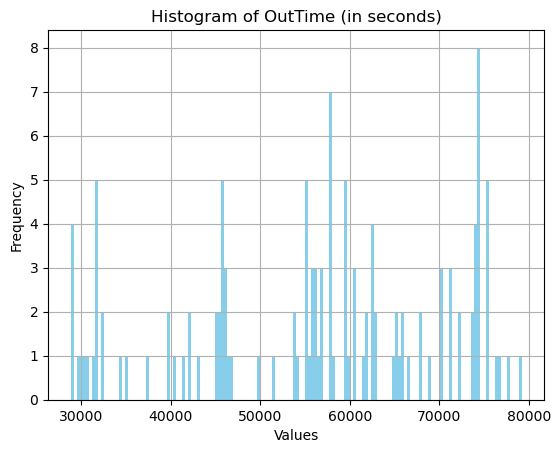

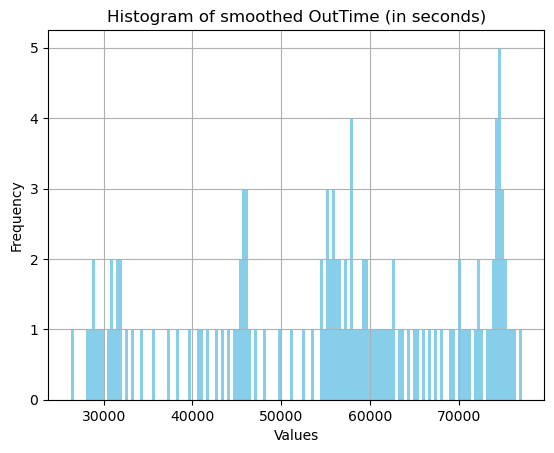

In [10]:
window_size = 5

smoothed_df = pd.DataFrame()
smoothed_df['OutTimeSeconds'] = df['OutTimeSeconds'].copy()
smoothed_df['SmoothedOutTimeSeconds'] = df['OutTimeSeconds'].rolling(window=window_size).mean()
smoothed_df.dropna(inplace=True)

plt.hist(smoothed_df['OutTimeSeconds'], bins=150, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of OutTime (in seconds)')
plt.grid(True)
plt.show()

plt.hist(smoothed_df['SmoothedOutTimeSeconds'], bins=150, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of smoothed OutTime (in seconds)')
plt.grid(True)
plt.show()

#### **4.2. Data Aggregation** - Not Applicable

#### **4.3. Data Generalization**

In [11]:
# Define time ranges for different parts of the day
time_ranges = {
    'Morning': (0, 43200),    # 00:00 to 12:00 (Morning)
    'Afternoon': (43200, 64800),  # 12:00 to 18:00 (Afternoon)
    'Evening': (64800, 86400)  # 18:00 to 24:00 (Evening)
}

# Function to map time to the corresponding part of the day
def get_time_of_day(seconds):
    for time_of_day, (start, end) in time_ranges.items():
        if start <= seconds < end:
            return time_of_day
    return None

# Apply the function to create new 'OutTimeOfDay' and 'InTimeOfDay' columns
# df['OutTimeOfDay'] = df['OutTimeSeconds'].apply(get_time_of_day)
# df['InTimeOfDay'] = df['InTimeSeconds'].apply(get_time_of_day)

# Use .loc to set the values properly without warnings
df = df.copy()
df.loc[:, 'OutTimeOfDay'] = df['OutTimeSeconds'].apply(get_time_of_day)
df = df.copy()
df.loc[:, 'InTimeOfDay'] = df['InTimeSeconds'].apply(get_time_of_day)
df

# timeofday_df = df[['RollNumber', 'OutTimeOfDay', 'InTimeOfDay']].copy()
# timeofday_df

,RollNumber,Hostel,VisitingPlace,OutTime,InTime,OutTimeSeconds,InTimeSeconds,OutTimeOfDay,InTimeOfDay
0,EC22B1116,Ashoka,Kandigai,05:35,06:40,20100,24000,Morning,Morning
1,CED191001,Ashwatha,Intern,07:30,17:20,27000,62400,Morning,Afternoon
2,ME20B2018,Ashwatha,Kandigai,07:35,08:00,27300,28800,Morning,Morning
3,CED191016,Ashwatha,Intern,07:50,17:30,28200,63000,Morning,Afternoon
4,EC22B1115,Ashoka,Kandigai,08:00,08:15,28800,29700,Morning,Morning
...,...,...,...,...,...,...,...,...,...
127,ME23B1006,Jasmine Annex,Milano,21:35,22:00,77700,79200,Evening,Evening
128,CED195036,Ashwatha,Kandigai,22:00,22:25,79200,80700,Evening,Evening
129,EC21B1005,Ashwatha,Kandigai,18:05,19:30,65100,70200,Evening,Evening
130,ME22B1021,Ashoka,Tambaram,17:10,21:25,61800,77100,Afternoon,Evening


In [12]:
# Function to get the batch of student from the roll number
def get_batch(roll_number):
    symbols = list(roll_number)
    batch = ''
    for symbol in symbols:
        if symbol >= '0' and symbol <= '9':
            batch += symbol
            if(len(batch) >= 2):
                break
    return int('20' + batch)
    
# Apply the function to create the new 'Batch' column
df = df.copy()
df.loc[:, 'Batch'] = df['RollNumber'].apply(get_batch)
df

,RollNumber,Hostel,VisitingPlace,OutTime,InTime,OutTimeSeconds,InTimeSeconds,OutTimeOfDay,InTimeOfDay,Batch
0,EC22B1116,Ashoka,Kandigai,05:35,06:40,20100,24000,Morning,Morning,2022
1,CED191001,Ashwatha,Intern,07:30,17:20,27000,62400,Morning,Afternoon,2019
2,ME20B2018,Ashwatha,Kandigai,07:35,08:00,27300,28800,Morning,Morning,2020
3,CED191016,Ashwatha,Intern,07:50,17:30,28200,63000,Morning,Afternoon,2019
4,EC22B1115,Ashoka,Kandigai,08:00,08:15,28800,29700,Morning,Morning,2022
...,...,...,...,...,...,...,...,...,...,...
127,ME23B1006,Jasmine Annex,Milano,21:35,22:00,77700,79200,Evening,Evening,2023
128,CED195036,Ashwatha,Kandigai,22:00,22:25,79200,80700,Evening,Evening,2019
129,EC21B1005,Ashwatha,Kandigai,18:05,19:30,65100,70200,Evening,Evening,2021
130,ME22B1021,Ashoka,Tambaram,17:10,21:25,61800,77100,Afternoon,Evening,2022


#### **4.4. Data Normalization** - Min Max Normalization

In [13]:
# columns_to_normalize = ['OutTimeSeconds', 'InTimeSeconds']
# def min_max_normalize(column):
#     max_value = column.max()
#     min_value = column.min()
#     normalized_column = (column - min_value) / (max_value - min_value)
#     return normalized_column

# for column in columns_to_normalize:
#     df[column+'Normailzed'] = min_max_normalize(df[column])

# df

#### **Save the cleaned dataset to a new file**

In [14]:
# df.to_csv('cleaned_student_movement.csv', index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


#### **Exploratory Data Analysis**

* #### **Outing Duration Analysis**

Average duration of outing:  02:01 7313
Minimum duration of outing:  00:10 600
Maximum duration of outing:  10:30 37800


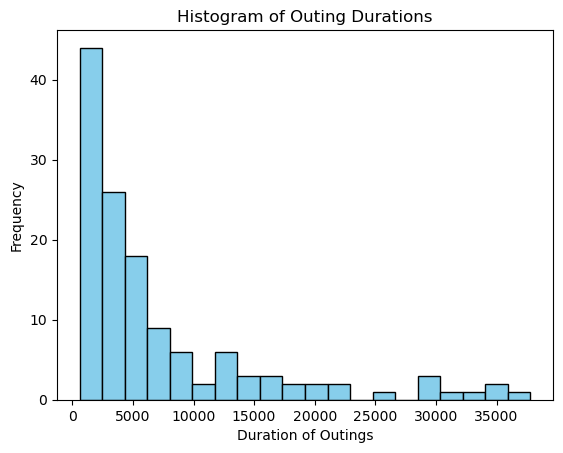

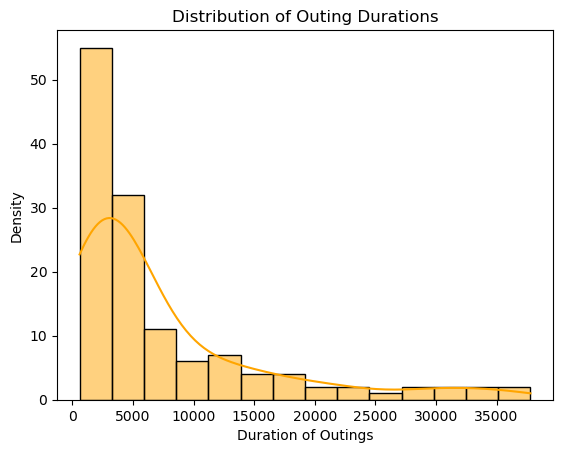

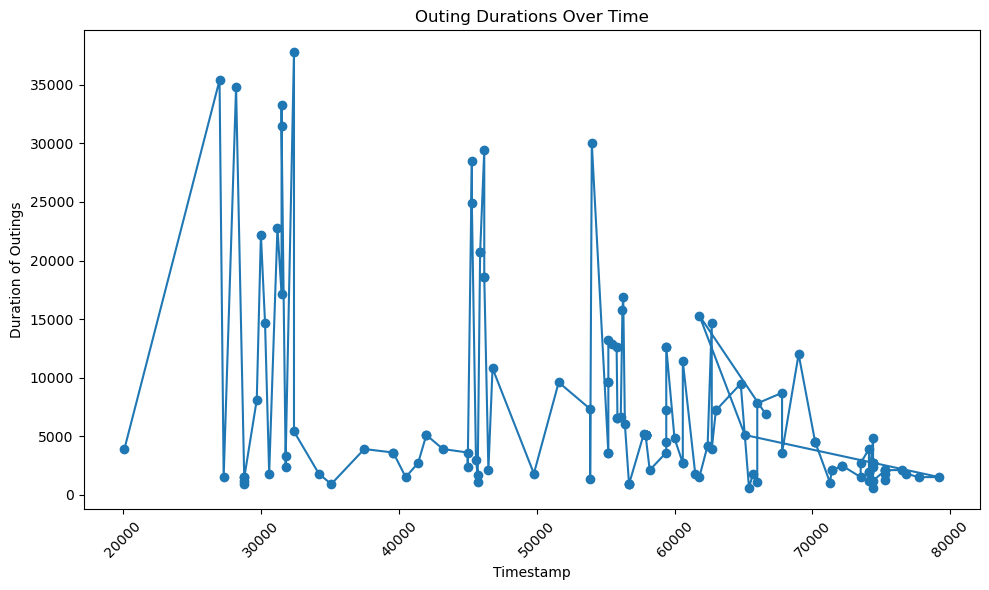

In [15]:
df['Duration'] = df['InTimeSeconds'] - df['OutTimeSeconds']
duration_stats = df['Duration'].describe()
avg_duration = duration_stats['mean']
print("Average duration of outing: ",time_format(avg_duration), int(avg_duration))
min_duration = duration_stats['min']
print("Minimum duration of outing: ",time_format(min_duration), int(min_duration))
max_duration = duration_stats['max']
print("Maximum duration of outing: ",time_format(max_duration), int(max_duration))

plt.hist(df['Duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration of Outings')
plt.ylabel('Frequency')
plt.title('Histogram of Outing Durations')
plt.show()

import seaborn as sns

# Distribution plot (histogram with a KDE)
sns.histplot(df['Duration'], kde=True, color='orange')
plt.xlabel('Duration of Outings')
plt.ylabel('Density')
plt.title('Distribution of Outing Durations')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['OutTimeSeconds'], df['Duration'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Duration of Outings')
plt.title('Outing Durations Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Heatmap** - Correlation between OutTime, InTime and Duration

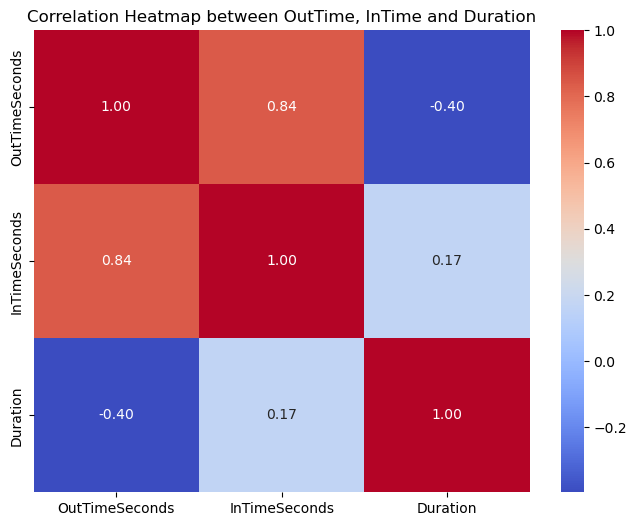

In [25]:
# Create a heatmap to visualize the correlation
correlation_matrix = df[['OutTimeSeconds', 'InTimeSeconds', 'Duration']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between OutTime, InTime and Duration')
plt.show()

* #### **Scatter Plot** - Holistic view of data distribution

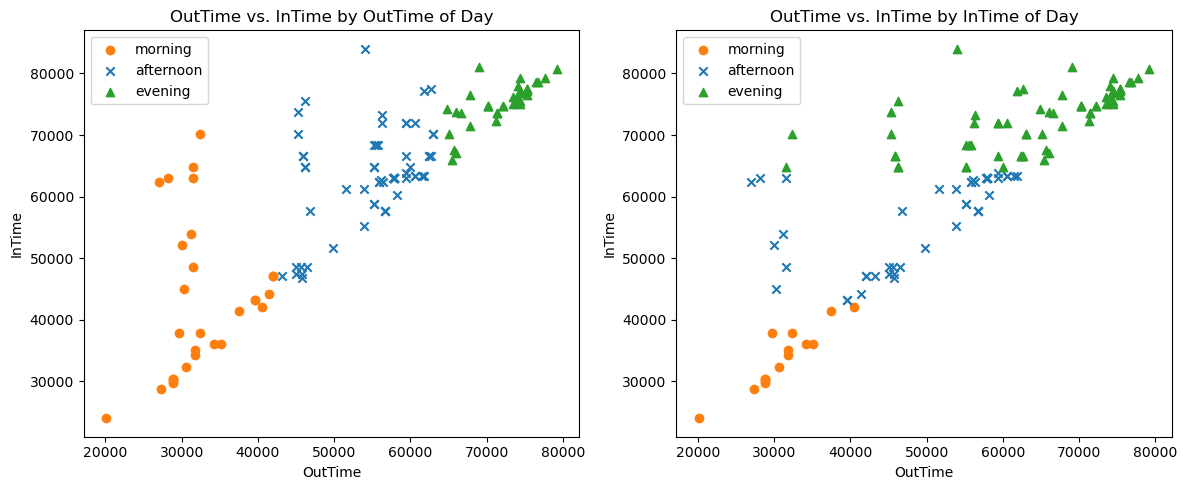

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns for subplots

# Scatter plot for OutTime vs. InTime by OutTimeOfDay
out_morning = df.loc[df['OutTimeOfDay'] == 'Morning', ['OutTimeSeconds', 'InTimeSeconds']]
out_afternoon = df.loc[df['OutTimeOfDay'] == 'Afternoon', ['OutTimeSeconds', 'InTimeSeconds']]
out_evening = df.loc[df['OutTimeOfDay'] == 'Evening', ['OutTimeSeconds', 'InTimeSeconds']]

axes[0].scatter(out_morning['OutTimeSeconds'], out_morning['InTimeSeconds'], label='morning', marker='o', color='tab:orange')
axes[0].scatter(out_afternoon['OutTimeSeconds'], out_afternoon['InTimeSeconds'], label='afternoon', marker='x', color='tab:blue')
axes[0].scatter(out_evening['OutTimeSeconds'], out_evening['InTimeSeconds'], label='evening', marker='^', color='tab:green')
axes[0].set_xlabel('OutTime')
axes[0].set_ylabel('InTime')
axes[0].set_title('OutTime vs. InTime by OutTime of Day')
axes[0].legend()

# Scatter plot for OutTime vs. InTime by InTimeOfDay
in_morning = df.loc[df['InTimeOfDay'] == 'Morning', ['OutTimeSeconds', 'InTimeSeconds']]
in_afternoon = df.loc[df['InTimeOfDay'] == 'Afternoon', ['OutTimeSeconds', 'InTimeSeconds']]
in_evening = df.loc[df['InTimeOfDay'] == 'Evening', ['OutTimeSeconds', 'InTimeSeconds']]

axes[1].scatter(in_morning['OutTimeSeconds'], in_morning['InTimeSeconds'], label='morning', marker='o', color='tab:orange')
axes[1].scatter(in_afternoon['OutTimeSeconds'], in_afternoon['InTimeSeconds'], label='afternoon', marker='x', color='tab:blue')
axes[1].scatter(in_evening['OutTimeSeconds'], in_evening['InTimeSeconds'], label='evening', marker='^', color='tab:green')
axes[1].set_xlabel('OutTime')
axes[1].set_ylabel('InTime')
axes[1].set_title('OutTime vs. InTime by InTime of Day')
axes[1].legend()

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

* #### Count of OutTime and InTime by Time of Day

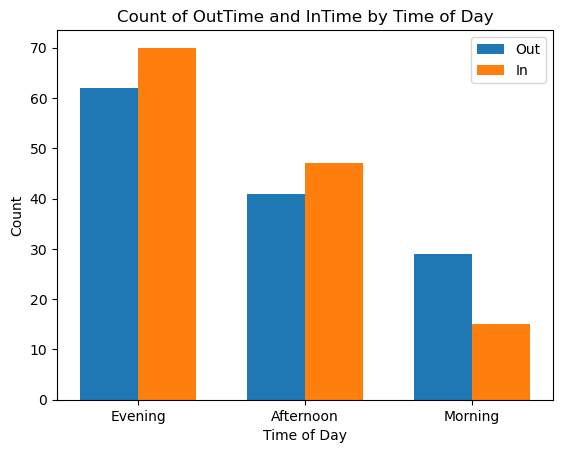

In [18]:
# Grouping by 'InTimeOfDay' and 'OutTimeOfDay' and counting occurrences
in_time_counts = df['InTimeOfDay'].value_counts()
out_time_counts = df['OutTimeOfDay'].value_counts()

# Creating a figure and two subplots for side-by-side bar plots
fig, ax = plt.subplots()

# Bar width for each set of bars
bar_width = 0.35

# Generating positions for bars
x = range(len(out_time_counts))

# Plotting the bars
ax.bar(x, out_time_counts, width=bar_width, label='Out')
ax.bar([pos + bar_width for pos in x], in_time_counts, width=bar_width, label='In')

# Setting labels and title
ax.set_xlabel('Time of Day')
ax.set_ylabel('Count')
ax.set_title('Count of OutTime and InTime by Time of Day')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(in_time_counts.index)
ax.legend()

plt.show()

* #### Hostel Distribution

Ashwatha         67
Ashoka           44
Jasmine Annex    21
Name: Hostel, dtype: int64


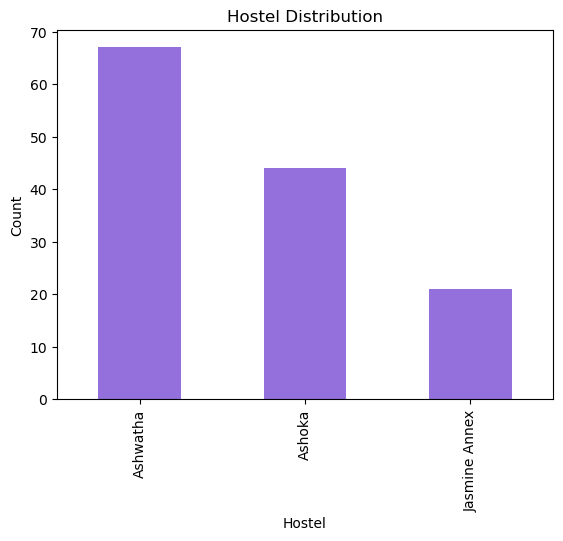

In [19]:
# Count the occurrences of each unique value in the 'Hostel' column
hostel_counts = df['Hostel'].value_counts()
print(hostel_counts)
# create bar chart for hostel
hostel_counts.plot(kind='bar', color='mediumpurple')
plt.title('Hostel Distribution')
plt.xlabel('Hostel')
plt.ylabel('Count')

plt.show()

* #### Visiting Place Distribution

Kandigai       56
Milano         19
Shop           10
Hospital        8
Mall            8
Tambaram        6
Kovalam         5
Intern          4
Kelambakkam     4
Hotel           4
Xerox           2
Navlur          2
Velacherry      1
Guindy          1
Chennai         1
Airport         1
Name: VisitingPlace, dtype: int64


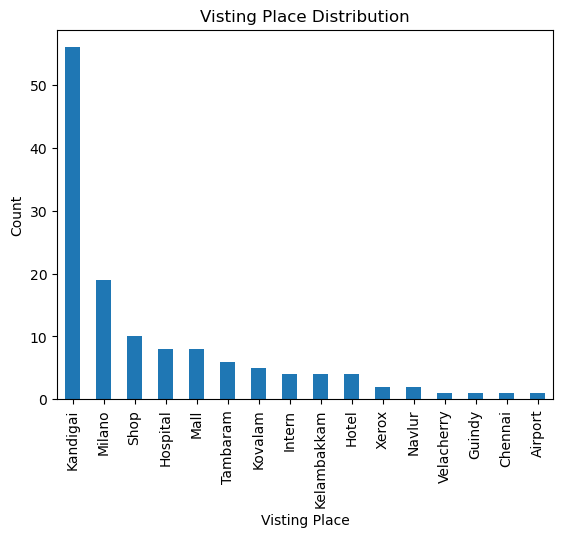

In [23]:
# Count the occurrences of each unique value in the 'VistingPlace' column
place_counts = df['VisitingPlace'].value_counts()
print(place_counts)

# create bar chart for visiting place
place_counts.plot(kind='bar',, color='mediumseagreen')
plt.title('Visting Place Distribution')
plt.xlabel('Visting Place')
plt.ylabel('Count')
plt.show()

* #### Percentage of Outings by Batch

2023    59
2020    32
2021    20
2022    15
2019     6
Name: Batch, dtype: int64


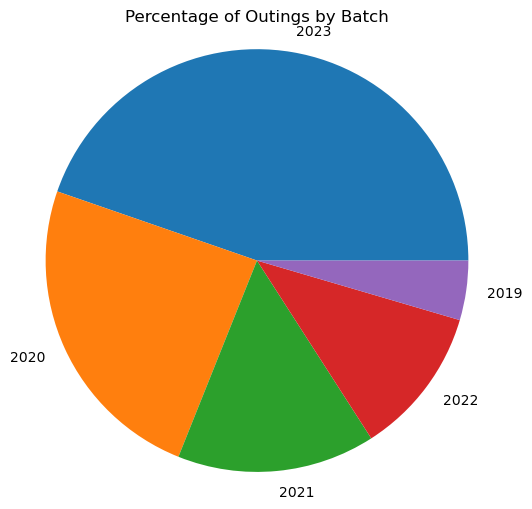

In [22]:
# Counting the number of records for each batch
batch_counts = df['Batch'].value_counts()
print(batch_counts)

# Plotting a pie chart showing the percentage of outings for each batch
plt.figure(figsize=(6, 6))
plt.pie(batch_counts, labels=batch_counts.index)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Outings by Batch')
plt.show()